<a href="https://colab.research.google.com/github/cano4est/Proyecto_final_IA/blob/main/Analisis_sentimientos_BanRep_Abril.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción de datos


In [ ]:
!pip install PyMuPDF --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.8/19.8 MB 92.8 MB/s eta 0:00:00


In [ ]:
!pip install transformers --q

In [ ]:
import fitz
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import sent_tokenize
nltk.download('punkt_tab')
from transformers import pipeline
from google.colab import files


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pdf_path = '/content/drive/MyDrive/Proyecto_final_IA/informes_politica_monetaria/informe-politica-monetaria-abril-2024.pdf'

# Limpieza de texto

## Eliminar páginas innecesarias

In [ ]:

# Abrir el documento original
doc = fitz.open(pdf_path)

# Crear un nuevo PDF
new_doc = fitz.open()

# Páginas a extraer
pages_to_extract = range(9, 39) #Cambiar el número de páginas según el informe

# Añadir las páginas seleccionadas al nuevo documento
for page_number in pages_to_extract:
    new_doc.insert_pdf(doc, from_page=page_number, to_page=page_number)

# Guardar el nuevo PDF
new_pdf_path = '/content/informe_monetario_filtrado_abril.pdf'
new_doc.save(new_pdf_path)

# Cerrar ambos documentos
doc.close()
new_doc.close()



In [ ]:
num_pages = len(new_pdf_path)
print(f"Número de páginas: {num_pages}")

Número de páginas: 45


In [ ]:
# Extraer texto del informe

# Abrir el PDF
pdf_path = '/content/informe_monetario_filtrado_abril.pdf'
doc = fitz.open(pdf_path)

# Extraer solo el texto de cada página (omitiendo gráficos)
text_content = []
for page_num in range(len(doc)):
    page = doc.load_page(page_num)
    # Extraer solo el contenido textual
    text = page.get_text("text")
    text_content.append(text)

# Combinar el contenido extraído
text_content_str = '\n'.join(text_content)

print(text_content_str[:1000])

1. Resumen
Gráfico 1.1
Índice de precios al consumidora/, b/
(variación anual, fin de periodo)
a/ El gráfico presenta la distribución de probabilidad del pronóstico y su senda 
más probable para un horizonte a 8 trimestres. La densidad caracteriza el balance 
prospectivo de riesgos con áreas del 30%, 60% y 90% de probabilidad alrededor 
del pronóstico central (moda), mediante la combinación de las densidades del 
Patacon y el 4GM.
b/ La distribución de probabilidad corresponde al ejercicio de pronóstico del 
Informe de abril.
Fuente: DANE; cálculos y proyecciones del Banco de la República.
Gráfico 1.2
IPC sin alimentos ni reguladosa/, b/
(variación anual, fin de periodo)
a/ El gráfico presenta la distribución de probabilidad del pronóstico y su senda más 
probable para un horizonte a 8 trimestres. La densidad caracteriza el balance pros-
pectivo de riesgos con áreas del 30%, 60% y 90% de probabilidad alrededor del 
pronóstico central (moda), mediante la combinación de las densidades de

## División del texto en frases

In [ ]:
# Extraer texto del informe

# Abrir el PDF
pdf_path = '/content/informe_monetario_filtrado_abril.pdf'
doc = fitz.open(pdf_path)

# Extraer solo el texto de cada página (omitiendo gráficos)
text_content = []
for page_num in range(len(doc)):
    page = doc.load_page(page_num)
    # Extraer solo el contenido textual
    text = page.get_text("text")
    text_content.append(text)

# Combinar el contenido extraído
text_content_str = '\n'.join(text_content)

# Verificar una muestra del contenido
print(text_content_str[:1000])

# Descargar el recurso 'punkt'
nltk.download('punkt')

# Filtrar gráficos, tablas y elementos irrelevantes
texto_filtrado = re.sub(r"Gráfco.*|Cuadro.*|Figura.*|Fuente:.*|^\s*\d+(\.\d+)?\s*$", "", text_content_str, flags=re.MULTILINE)

# Tokenizar el texto en frases utilizando NLTK
frases = sent_tokenize(texto_filtrado)

# Crear el DataFrame con cada frase
df = pd.DataFrame(frases, columns=['Frase'])

# Mostrar una muestra del DataFrame para verificar
print(df.head())

# Guardar el DataFrame en un CSV si se necesita
df.to_csv('frases_informes.csv', index=False)

# Descargar el archivo CSV
#files.download('frases_informes.csv')



1. Resumen
Gráfico 1.1
Índice de precios al consumidora/, b/
(variación anual, fin de periodo)
a/ El gráfico presenta la distribución de probabilidad del pronóstico y su senda 
más probable para un horizonte a 8 trimestres. La densidad caracteriza el balance 
prospectivo de riesgos con áreas del 30%, 60% y 90% de probabilidad alrededor 
del pronóstico central (moda), mediante la combinación de las densidades del 
Patacon y el 4GM.
b/ La distribución de probabilidad corresponde al ejercicio de pronóstico del 
Informe de abril.
Fuente: DANE; cálculos y proyecciones del Banco de la República.
Gráfico 1.2
IPC sin alimentos ni reguladosa/, b/
(variación anual, fin de periodo)
a/ El gráfico presenta la distribución de probabilidad del pronóstico y su senda más 
probable para un horizonte a 8 trimestres. La densidad caracteriza el balance pros-
pectivo de riesgos con áreas del 30%, 60% y 90% de probabilidad alrededor del 
pronóstico central (moda), mediante la combinación de las densidades de

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                               Frase
0                                                 1.
1  Resumen\nGráfico 1.1\nÍndice de precios al con...
2  La densidad caracteriza el balance \nprospecti...
3  b/ La distribución de probabilidad corresponde...
4  Gráfico 1.2\nIPC sin alimentos ni reguladosa/,...


## Implementación limpieza de texto

In [ ]:

# Leer el archivo CSV
df = pd.read_csv('frases_informes.csv')

# Convertir las frases a una lista
frases = df['Frase'].tolist()

# Filtrar frases que contienen pocas palabras (menos de 5)
frases = [frase for frase in frases if len(frase.split()) > 4]

# Eliminar frases que contienen solo números o que tienen muy pocos caracteres útiles
def es_frase_irrelevante(frase):
    if re.match(r'^\s*\d+(\.\d+)?\s*$', frase):
        return True
    if len(re.sub(r'[^\w\s]', '', frase).strip()) < 5:
        return True
    return False

frases = [frase for frase in frases if not es_frase_irrelevante(frase)]

# Filtrar frases que contienen patrones irrelevantes
patrones_irrelevantes = [
    r'Gráf(co|ico).*',  # Cualquier mención de gráficos
    r'Informe de .*',   # Encabezados como "Informe de abril"
    r'\b(I{1,3}|IV|VI{0,3})\b',  # Números romanos
    r'\d+,\d+',  # Valores numéricos en leyendas
    r'\b(porcentaje|Fuente:|tasa de interés|brecha del producto)\b',
    r'\b(Credit default swap|Tasa de cambio nominal)\b',  # Palabras clave en frases incoherentes
    r'(Chile|Perú|Brasil|México)(\s+\w+)*',  # Frases con nombres de países en secuencia
    r'(nov|mar|jul|may|ene|abr|jun|ago|sep|oct|dic)-\d{2}',  # Fechas en formato "may-21", "jul-22", etc.
    r'\(.*índice.*\)',  # Leyendas con "índice" o "(porcentaje)", "(puntos base)", etc.
    r'^\s*Nota:.*',  # Frases que empiezan con "Nota:" (habitualmente leyendas)
    r'^\s*$',  # Filtrar líneas vacías
    r'\b(puntos base|índice.*= 100)\b',  # Leyendas sobre puntos base o índices
    r'\b(miles de personas|eje derecho|agregado nacional|otras cabeceras|rural|veintitrés ciudades|asalariado|no asalariado)\b',  # Palabras clave de leyendas y categorías
    r'(may|ene|feb|mar|abr|jun|jul|ago|sep|oct|nov|dic)-\d{2}(\s*)?(\n|$)',  # Listas de fechas consecutivas
    r'^.*\b(vol\.|ed\.|revista|institución|basado en|database|review|journal|economic|modelo)\b.*$',  # Referencias con términos como "vol.", "institución", "review", etc.
    r'“.*”',  # Títulos entre comillas dobles
    r'[A-Z][a-z]+(?:-[A-Z][a-z]+)?,\s[A-Z]\.\s(?:\(\d{4}\))?',  # Nombres de autores con inicial y año (e.g. "Torres-Gorron, J. E. (2017)")
    r'^[a-z]\/.*'  # Frases que comienzan con "a/", "b/", "c/", etc.
    r'\(.*?\)'  # Eliminar contenido entre paréntesis
    r'\b[a-b]/',  # Eliminar todas las ocurrencias de "a/" y "b/"
]

# Aplicar los patrones irrelevantes para filtrar
for patron in patrones_irrelevantes:
    frases = [frase for frase in frases if not re.search(patron, frase, flags=re.IGNORECASE)]

# Aplicar el filtro adicional para texto extraído
#texto_filtrado = re.sub(r"Gráfco.*|Cuadro.*|Figura.*|Fuente:.*|^\s*\d+(\.\d+)?\s*$", "", texto_extraido, flags=re.MULTILINE)

# Filtrar frases que contienen palabras irrelevantes
palabras_irrelevantes = ['gráfico', 'fuente', 'tabla', 'cuadro', 'variación', 'pronóstico', 'porcentaje', 'recuadro']

def contiene_palabras_irrelevantes(frase):
    return any(palabra in frase.lower() for palabra in palabras_irrelevantes)

frases = [frase for frase in frases if not contiene_palabras_irrelevantes(frase)]

# Filtrar frases mayormente numéricas o con pocos caracteres útiles
def frase_mayormente_numerica(frase):
    num_alfanum = sum(char.isalnum() for char in frase)
    return num_alfanum / max(1, len(frase)) < 0.5

frases = [frase for frase in frases if not frase_mayormente_numerica(frase)]

# Diccionario personalizado de correcciones ortográficas
correcciones = {
    "infación": "inflación",
    "desinfación": "desinflación",
    "Gráfco": "Gráfico",
    "fnalizar": "finalizar",
    "fnales": "finales",
    "refejando": "reflejando",
    "fnanciamiento": "financiamiento",
    "fnancieras": "financieras",
    "ofcinas": "oficinas",
    "confanza": "confianza",
    "fexibilización": "flexibilización",
    "fnalizarían": "finalizarían",
    "modifcaciones": "modificaciones",
    "desinfacionario": "desinflacionario",
    "desinfacionarias": "desinflacionarias",
    "infacionararia": "inflacionaria",
    "infacionario": "inflacionario",
    "refejar": "reflejar",
    "refejarse": "reflejarse",
    "défcit": "déficit",
    "fn": "fin",
    "confictos": "conflictos",
    "signifcativamente": "significativamente",
    "signifcativas":"significativas",
    "científcas": "científicas",
    "fjo": "fijo",
    "fja": "fija",
    "edifcaciones": "edificaciones",
    "edifcios": "edificios",
    "cuantifcar": "cuantificar",
    "défcit": "déficit",
    "fujos": "flujos",
    "certifcados": "certificados",
    "refejó": "reflejó",
    "insufciente": "insuficiente",
    "modifcados": "modificados",
    "fscal": "fiscal",
    "fnal": "final",
    "refejo": "reflejo",
    "fnanciar": "financiar"
}

# Aplicar las correcciones ortográficas
def corregir_ortografia(frase):
    for palabra_mal, palabra_bien in correcciones.items():
        frase = re.sub(r'\b' + re.escape(palabra_mal) + r'\b', palabra_bien, frase, flags=re.IGNORECASE)
    return frase

frases_corregidas = [corregir_ortografia(frase) for frase in frases]

# Guardar las frases corregidas en un nuevo archivo de texto
with open('frases_filtradas_corregidas.txt', 'w', encoding='utf-8') as file:
    for frase in frases_corregidas:
        file.write(frase + '\n')

#files.download('frases_filtradas_corregidas.txt')


## Tabular las frases

In [ ]:

# Leer el archivo de texto proporcionado
with open('/content/frases_filtradas_corregidas.txt', 'r', encoding='utf-8') as file:
    contenido = file.read()

# Unir las líneas que se cortan con guiones
contenido = re.sub(r'-\n', '', contenido)

# Unir las líneas separadas por saltos de línea para formar oraciones completas
contenido = re.sub(r'\n', ' ', contenido)

# Separar las frases utilizando el punto (.) como delimitador
frases = re.split(r'\.\s+', contenido)  # Divide el texto en cada punto seguido de un espacio

# Quitar espacios adicionales y frases vacías
frases = [frase.strip() for frase in frases if frase.strip()]

# Crear el DataFrame con dos columnas: "frases_banrep" y "informe"
df = pd.DataFrame({
    'frases_banrep': frases,
    'informe': ['informe_abril_2024'] * len(frases)
})

# Mostrar las primeras filas del DataFrame para verificar
print(df.head())

# Guardar el DataFrame en un archivo CSV
df.to_csv('frases_informe_abril_2024.csv', sep= '|', index=False)
#files.download('frases_informe_julio_2024.csv')


                                       frases_banrep             informe
0  Las acciones acumuladas de la política monetar...  informe_abril_2024
1  Entre diciembre  de 2023 y marzo de este año t...  informe_abril_2024
2  Este comportamiento se explicó por la apreciac...  informe_abril_2024
3  Lo anterior, en el contexto de  una política m...  informe_abril_2024
4  Hacia adelante se continúa previendo la conver...  informe_abril_2024


# Implementar el modelo

In [ ]:
# Crear el pipeline de análisis de sentimientos usando el modelo "bardsai/finance-sentiment-es-base"
nlp = pipeline("sentiment-analysis", model="bardsai/finance-sentiment-es-base")

# Aplicar el modelo a cada una de las frases en la columna "frases_banrep" y guardar los resultados en nuevas columnas
df['resultado_nlp'] = df['frases_banrep'].apply(lambda x: nlp(x)[0])
df['sentimiento'] = df['resultado_nlp'].apply(lambda x: x['label'])
df['score'] = df['resultado_nlp'].apply(lambda x: x['score'])

# Eliminar la columna intermedia "resultado_nlp" ya que no es necesaria en el DataFrame final
df.drop(columns=['resultado_nlp'], inplace=True)

# Mostrar las primeras filas del DataFrame para verificar
print(df.head())

# Guardar el DataFrame en un archivo CSV con el delimitador "|"
df.to_csv('frases_informe_abril_2024_con_sentimientos.csv', sep='|', index=False)
files.download('frases_informe_abril_2024_con_sentimientos.csv')


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


                                       frases_banrep             informe  \
0  Las acciones acumuladas de la política monetar...  informe_abril_2024   
1  Entre diciembre  de 2023 y marzo de este año t...  informe_abril_2024   
2  Este comportamiento se explicó por la apreciac...  informe_abril_2024   
3  Lo anterior, en el contexto de  una política m...  informe_abril_2024   
4  Hacia adelante se continúa previendo la conver...  informe_abril_2024   

  sentimiento     score  
0     neutral  0.983776  
1    negative  0.999888  
2    positive  0.999931  
3    negative  0.999879  
4    negative  0.999859  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   frases_banrep  248 non-null    object 
 1   informe        248 non-null    object 
 2   sentimiento    248 non-null    object 
 3   score          248 non-null    float64
dtypes: float64(1), object(3)
memory usage: 7.9+ KB


# Visualización de datos

<ipython-input-22-8bd14908ad6d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentimiento', palette='viridis')


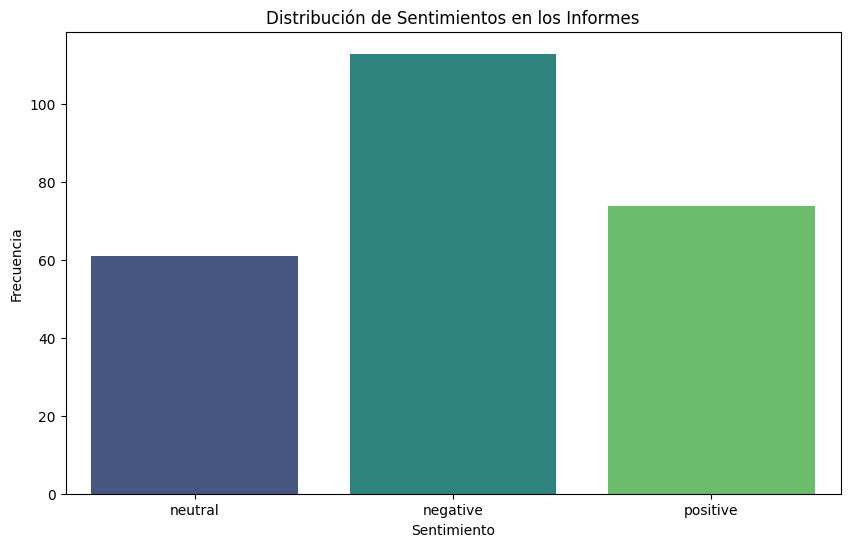

In [ ]:
# Crear un gráfico de barras para la distribución de tipos de sentimiento
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentimiento', palette='viridis')

# Añadir título y etiquetas
plt.title('Distribución de Sentimientos en los Informes')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
# Resumen estadístico

# 1. Conteo de frases por tipo de sentimiento
conteo_sentimientos = df['sentimiento'].value_counts()

# 2. Promedio y mediana de scores por tipo de sentimiento
promedio_scores = df.groupby('sentimiento')['score'].mean()
mediana_scores = df.groupby('sentimiento')['score'].median()

# 3. Desglose por informe
desglose_informe = df.groupby(['informe', 'sentimiento']).size().unstack(fill_value=0)

# Mostrar los resultados
print("Conteo de frases por tipo de sentimiento:")
print(conteo_sentimientos, '\n')

print("Promedio de scores por tipo de sentimiento:")
print(promedio_scores, '\n')

print("Mediana de scores por tipo de sentimiento:")
print(mediana_scores, '\n')

print("Desglose de frases por informe y tipo de sentimiento:")
print(desglose_informe, '\n')


Conteo de frases por tipo de sentimiento:
sentimiento
negative    113
positive     74
neutral      61
Name: count, dtype: int64 

Promedio de scores por tipo de sentimiento:
sentimiento
negative    0.989809
neutral     0.991970
positive    0.988744
Name: score, dtype: float64 

Mediana de scores por tipo de sentimiento:
sentimiento
negative    0.999871
neutral     0.999980
positive    0.999928
Name: score, dtype: float64 

Desglose de frases por informe y tipo de sentimiento:
sentimiento         negative  neutral  positive
informe                                        
informe_abril_2024       113       61        74 

